In [1]:
#케라스 로딩
import keras
keras.__version__


'2.9.0'

In [2]:
# 뉴스 기사 분류: 다중 분류 문제
# 로이터 뉴스를 46개의 토픽으로 분류하는 신경망(다중분류)
## 로이터 데이터셋
#1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 데이터셋 (케라스 내장 데이터셋)
# 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋
# 46개의 토픽
# 각 토픽은 최소 10개의 샘플이 있음
# 데이터 다운로드
from keras.datasets import reuters
# 자주 등장하는 단어 10,000개로 제한
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
# 8,982개의 학습용 샘플과 2,246개의 검증용 샘플
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
#각 샘플은 정수 리스트
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [23]:
#단어 디코딩 예
#단어 인덱스 다운로드
word_index = reuters.get_word_index()
print(list(word_index.items())[:10])
reverse_word_index = dict([(value, key) for (key, value) in
word_index.items()])
print(list(reverse_word_index.items())[:10])

[('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997), ('hermann', 8804)]
[(10996, 'mdbl'), (16260, 'fawc'), (12089, 'degussa'), (8803, 'woods'), (13796, 'hanging'), (20672, 'localized'), (20673, 'sation'), (20675, 'chanthaburi'), (10997, 'refunding'), (8804, 'hermann')]


In [7]:
# 레이블은 토픽의 인덱스로 0과 45사이의 정수
train_labels[10]

3

In [8]:
## 데이터 준비
#데이터를 벡터로 변환
import numpy as np
# 랜덤시드 고정
np.random.seed(5)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# 학습용 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 검증용 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [9]:
# one hot encoding : 범주형 데이터에 널리 사용되는 방법
# 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [24]:
from keras import models
from keras import layers
model = models.Sequential()
# 입력층, 노드 64개
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
# 은닉층, 노드 64개
model.add(layers.Dense(64, activation='relu'))
# 출력층, 노드 46개(소프트맥스, 각 출력 클래스에 대한 확률 분포 출력, 46개의 값을 모두 더하면 1이 됨)
model.add(layers.Dense(46, activation='softmax'))

In [12]:
# softmax 활성화 함수 - 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포 출력(두 확률 분포의 사이의 거리를 측정)
# 신경망이 출력한 확률 분포와 실제 레이블의 분포 사이의 거리
# 두 분포 사이의 거리를 최소화하면 실제 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 됨
# 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률
# 46개의 값을 모두 더하면 1이 됨
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [13]:
#Train,Validation 구분
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=5,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/5
16/16 [==============================] - 2s 35ms/step - loss: 2.5522 - accuracy: 0.5252 - val_loss: 1.6758 - val_accuracy: 0.6600
Epoch 2/5
16/16 [==============================] - 0s 17ms/step - loss: 1.3684 - accuracy: 0.7151 - val_loss: 1.2717 - val_accuracy: 0.7330
Epoch 3/5
16/16 [==============================] - 0s 16ms/step - loss: 1.0177 - accuracy: 0.7794 - val_loss: 1.1253 - val_accuracy: 0.7650
Epoch 4/5
16/16 [==============================] - 0s 18ms/step - loss: 0.8026 - accuracy: 0.8301 - val_loss: 1.0220 - val_accuracy: 0.7760
Epoch 5/5
71/71 [==============================] - 0s 4ms/step - loss: 1.0157 - accuracy: 0.7765


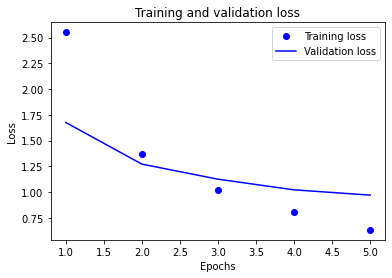

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

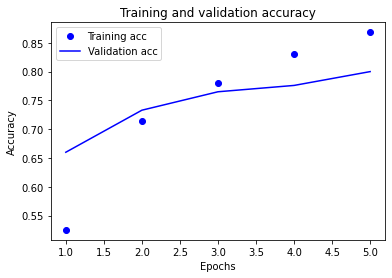

In [16]:
plt.clf() # 그래프 초기화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# 정확도
results


[1.0156875848770142, 0.7764915227890015]

In [18]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [19]:
# 길이가 46인 벡터
predictions[0].shape

(46,)

In [20]:
# 46개의 숫자를 모두 더하면 1이 됨
predictions[0]

array([4.3231819e-04, 5.9241122e-03, 5.6071492e-04, 6.8453050e-01,
       2.5911671e-01, 8.3870102e-05, 2.7679891e-04, 5.5585097e-05,
       2.1123546e-03, 9.9129255e-05, 6.5506401e-04, 5.5743507e-03,
       8.1300235e-04, 1.5049888e-03, 1.8945210e-04, 8.3836509e-05,
       1.6396590e-02, 1.0944614e-03, 1.4260556e-03, 2.7777036e-03,
       5.3993207e-03, 2.3946259e-03, 6.2208142e-05, 1.2392078e-03,
       3.3494416e-05, 6.7286723e-04, 7.6001765e-05, 9.1048030e-05,
       2.4549072e-04, 1.9579616e-04, 1.4266417e-04, 4.8481885e-04,
       5.9795380e-05, 3.5402129e-05, 1.7406004e-03, 1.1407040e-04,
       1.0945125e-03, 3.6561425e-04, 6.2460080e-05, 3.8734238e-04,
       6.3612807e-04, 1.0008601e-04, 1.3813468e-05, 1.5643032e-04,
       4.5950079e-04, 2.9000903e-05], dtype=float32)

In [21]:
# 이 벡터의 원소 합은 1
np.sum(predictions[0])

0.9999999

In [22]:
#가장 확률이 높은 클래스
np.argmax(predictions[0])

3